**Introduction of Natural Language Processing (NLP)**

At the end of this workshop, you will be able to understand

*   the basic NLP pipeline
*   the different word embeddings and their pros and cons 
*   how to use custom stop words
*   the implementation of NLP in Python 
*   how to use Google Colab (- if you are not already familiar :) )



## **What is NLP?** 

- Sub field of Computer Science and Artificial Intelligence that focuses on interactions between computer and human (natural) languages 
- Application of machine learning (ML) and deep learning (DL) algorithms to text and speech (datasets). 
- Applications: Speech recognition, machine translation, spam detection, auto complete/next word suggestion, chat bot etc. 


# **NLP Pipeline**

Here, NLP pipeline refers to the pre-processing steps that should be applied on the text data before proceeding towards the machine learning aspect of the model. 

For example, the **objective** of a project is identification of e-mails as spam (or non-spam). 

1.   Identification of *type of ML problem*: Classification (using text data)
2.   ML algorithms: Multinomial naive bayes, Logistic Regression and Support Vector Machine

Great! We have an idea about the type of problem and what possible ML algorithms to use. But before that, how do we process the text data?  

Here is an outline of the steps that we could use for processig the text data:

### **Text Pre-processing** 

1.   Spell check (- depending on the context)
1.   Sentence Tokenization
2.   Word Tokenization
3.   Conversion to lower case
4.   Lexicon Normalization: Lemmatization and Stemming 
5.   Removal of puncatuations and stop words (and numbers - depending on the context)
6.   Parts-of-speech (POS) tagging 
7.   Feature Generation/Creation of n-grams 

### **Exploratory Analysis**

1.   Word Cloud
2.   Distribution of data with respect to each class 

### **Word Embeddings** 

1.   Bag-of-Words (BoW)
2.   Term Frequency (TF)
3.   Term Frequency - Inverse Document Frequency (TF - IDF)
4.   Pre-trained (Neural) Word Embeddings 

> * Word level embeddings: Word2Vec and Glove 
> * Character level embeddings: ELMo and Flair 

We will explore each of these topics using a dataset. 


## **Resources in Python**

* [NLTK](https://www.nltk.org/): Natural Language Tool Kit 
* [spaCy](https://spacy.io/)
* [Gensim](https://github.com/RaRe-Technologies/gensim)
-----
* [TextBlob](https://textblob.readthedocs.io/en/dev/)
* [CoreNLP](https://stanfordnlp.github.io/CoreNLP/)
* [polyglot](https://polyglot.readthedocs.io/en/latest/index.html)

### **NLP Pipeline**

#### *Spell Check*
 To check for spelling errors and to get possible alternatives for the misspelled words. 


*   Using `autocorrect` module 
*   Using `pyspellchecker` module: It uses a [*Levenshtein Distance*](https://dzone.com/articles/the-levenshtein-algorithm-1#:~:text=The%20Levenshtein%20distance%20is%20a,one%20word%20into%20the%20other.) to find permutations within an edit distance of 2 from the original word. It then compares all permutations (insertions, deletions, replacements, and transpositions) to known words in a word frequency list. Those words that are found more often in the frequency list are more likely the correct results.
*   Using `textblob` module: returns two values – a recommended correction for this word, and a confidence score associated with the correction.


In [ ]:
#!pip install autocorrect
#Using autocorrect module 
from autocorrect import Speller

spell = Speller(lang='en')

print(spell('caaaar'))
print(spell('mussage'))
print(spell('survice'))
print(spell('hte'))
print(spell("Let is check whehter spel check works hree"))  #Correct sentence: Let us check whether spell check works here


caesar
message
service
the
Let is check whether spell check works here


In [ ]:
#Using pyspellchecker 
#!pip install pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['let', 'us', 'wlak','on','the','groun'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

group
{'grout', 'ground', 'groin', 'grown', 'groan', 'group'}
walk
{'flak', 'walk', 'weak'}


In [ ]:
#!pip install textblob
from textblob import Word
from textblob import TextBlob

word = Word('personell')
print(word.spellcheck())

b = TextBlob("I havv goood speling!")
print(b.correct())

[('personal', 0.65), ('personally', 0.2642857142857143), ('peroneal', 0.06428571428571428), ('personnel', 0.014285714285714285), ('personen', 0.007142857142857143)]
I have good spelling!


#### *Sentence Tokenization*

To break paragraphs into sentences

In [ ]:
from nltk.tokenize import sent_tokenize

text=""""Oh, Marilla, looking forward to things is half the pleasure of them," exclaimed Anne. 
        "You mayn’t get the things themselves; but nothing can prevent you from having the fun of looking forward to them. 
        Mrs. Lynde says, 'Blessed are they who expect nothing for they shall not be disappointed.' 
        But I think it would be worse to expect nothing than to be disappointed."""

#Text from Anne of Green Gables

tokenized_text=sent_tokenize(text)

print(tokenized_text)

#### *Word Tokenization*

To break sentences into words (or tokens)

In [ ]:
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(text)
print(tokenized_word)

['``', 'Oh', ',', 'Marilla', ',', 'looking', 'forward', 'to', 'things', 'is', 'half', 'the', 'pleasure', 'of', 'them', ',', "''", 'exclaimed', 'Anne', '.', '``', 'You', 'mayn', '’', 't', 'get', 'the', 'things', 'themselves', ';', 'but', 'nothing', 'can', 'prevent', 'you', 'from', 'having', 'the', 'fun', 'of', 'looking', 'forward', 'to', 'them', '.', 'Mrs.', 'Lynde', 'says', ',', "'Blessed", 'are', 'they', 'who', 'expect', 'nothing', 'for', 'they', 'shall', 'not', 'be', 'disappointed', '.', "'", 'But', 'I', 'think', 'it', 'would', 'be', 'worse', 'to', 'expect', 'nothing', 'than', 'to', 'be', 'disappointed', '.']


#### *Conversion to lower case*

Converting the text (in upper case or sentence case) to lower case. 

1.   Helps to maintain consistency of expected output.
2.   Maintains uniformity among different cases - easiers to search. For instance, searching for "Canada" may not yield results - if the text is "canada"
3.   Often times, word embeddings might perform poorly 



In [ ]:
lower_case_text = text.lower()
print(lower_case_text)

"oh, marilla, looking forward to things is half the pleasure of them," exclaimed anne. 
        "you mayn’t get the things themselves; but nothing can prevent you from having the fun of looking forward to them. 
        mrs. lynde says, 'blessed are they who expect nothing for they shall not be disappointed.' 
        but i think it would be worse to expect nothing than to be disappointed.


#### *Removal of punctuations and stop words*

Stop words such as "a", "the", "in" etc do not add meaning in the text analysis and are considered as noise in the data. Hence, they should be removed. Also, it is advisable to remove the punctuations and numbers (depending upon the context). 

P.S.: Sometimes, removing the punctuation might distort the meaning of the word. For instance, in the sentence "you're good" would return "youre good" - where the meaning of the sentence is lost 

In [ ]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)


filtered_sent=[]

for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

{'too', 't', 'were', 'because', 'wouldn', 'can', 'yourselves', 'is', 'hadn', 'through', 'now', "aren't", 'or', 're', "mustn't", "doesn't", 'was', "that'll", 'i', 'down', 'we', 'isn', "weren't", 'some', 'by', 'so', "couldn't", 'very', 'been', 'these', 'how', 'himself', 'o', 'don', "mightn't", "she's", 'from', 'do', 'haven', 'the', 'ain', 'have', "needn't", 'being', 'while', 'until', 'of', 'has', 'themselves', 'at', 'not', 'are', 'myself', 'on', "it's", 'about', "isn't", 'just', 'her', 'their', 'mightn', 'then', 'where', 'than', 'they', 'nor', 'them', 'off', 'against', 'only', 'and', 'y', 've', 'weren', 'above', 'for', 'which', 'your', 'itself', 'ma', 'he', 'd', 'with', 'does', 'ourselves', 'yourself', 'an', 'what', 'below', 'other', 'such', 'aren', 'you', 'under', "hadn't", "you'd", 'once', 'own', "should've", 'between', 'after', 'up', 'be', 'any', 'will', 'in', 'again', 'she', "you're", 'here', 'this', 'when', 'won', "shan't", 'did', 'should', 'me', 'needn', 'as', "didn't", 'its', 'my'

In [ ]:
#Removal of punctuations

words_no_punkt = [word for word in tokenized_word if word.isalpha()]
print(words_no_punkt[:100])

['Oh', 'Marilla', 'looking', 'forward', 'to', 'things', 'is', 'half', 'the', 'pleasure', 'of', 'them', 'exclaimed', 'Anne', 'You', 'mayn', 't', 'get', 'the', 'things', 'themselves', 'but', 'nothing', 'can', 'prevent', 'you', 'from', 'having', 'the', 'fun', 'of', 'looking', 'forward', 'to', 'them', 'Lynde', 'says', 'are', 'they', 'who', 'expect', 'nothing', 'for', 'they', 'shall', 'not', 'be', 'disappointed', 'But', 'I', 'think', 'it', 'would', 'be', 'worse', 'to', 'expect', 'nothing', 'than', 'to', 'be', 'disappointed']


#### *Lexicon normalization: Lemmatization and Stemming*

*Stemming*: Reduces the words to their root form by removing the derivational affixes. For instance, connection, connected, connecting word reduce to a common word "connect". 

> 1.   Porter Stemmer: Uses a set of five rules to remove the suffix (also known as suffix stripping)
> 2.   Lancaster Stemmer: Uses an iterative algorithm that uses a set of 120 rules to remove the suffixes. The algorithm tries to find an applicable rule by the last character of the word. Each rule specifies a replacement or deletion of a terminal character. It continues till it could find no such rule. Another stopping criterion - a word starting with a vowel and with only two characters left; or a word starting with a consonant and with only three characters left. 
The process repeats till it meets one of the stopping criteria. However, this could lead to over stemming. 

*Lemmatization*: Reduces words to their base word (or called lemmas). Since it is based on morphological analysis, lemmatization is better than stemming. Stemmer ignores the context of the word. For example, lemma of "better" is "good" - which is missed by the stemmer. 

In [ ]:
from nltk import PorterStemmer, LancasterStemmer  #Other stemmer is LancasterStemmer; PorterStemmer is commonly used since it is simple and fast to use 
porter = PorterStemmer()
lancaster=LancasterStemmer()

#A list of words to be stemmed
word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding","railroad","moonlight","football"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

print("{0:20}{1:20}".format("Word","Lemma"))
for word in words_no_punkt:
    print ("{0:20}{1:20}".format(word,lem.lemmatize(word)))

Word                Lemma               
Oh                  Oh                  
Marilla             Marilla             
looking             looking             
forward             forward             
to                  to                  
things              thing               
is                  is                  
half                half                
the                 the                 
pleasure            pleasure            
of                  of                  
them                them                
exclaimed           exclaimed           
Anne                Anne                
You                 You                 
mayn                mayn                
t                   t                   
get                 get                 
the                 the                 
things              thing               
themselves          themselves          
but                 but                 
nothing             nothing             
can             

In [ ]:
for word in words_no_punkt:
    print ("{0:20}{1:20}".format(word,lem.lemmatize(word, pos="v")))

Oh                  Oh                  
Marilla             Marilla             
looking             look                
forward             forward             
to                  to                  
things              things              
is                  be                  
half                half                
the                 the                 
pleasure            pleasure            
of                  of                  
them                them                
exclaimed           exclaim             
Anne                Anne                
You                 You                 
mayn                mayn                
t                   t                   
get                 get                 
the                 the                 
things              things              
themselves          themselves          
but                 but                 
nothing             nothing             
can                 can                 
prevent         

#### *Parts-of-speech (POS) tagging*

Identifies the grammar groups (such as noun, verb, pronoun etc) in the text

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(words_no_punkt[:15]) #IN- preposition; NNP- noun, proper, singular; VB - Verb; RB - adverb; TO: "to" as preposition or infinitive marker; 
#VBG: verb, present participle or gerund; VBD: verb, past tense


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Oh', 'UH'),
 ('Marilla', 'NNP'),
 ('looking', 'VBG'),
 ('forward', 'RB'),
 ('to', 'TO'),
 ('things', 'NNS'),
 ('is', 'VBZ'),
 ('half', 'PDT'),
 ('the', 'DT'),
 ('pleasure', 'NN'),
 ('of', 'IN'),
 ('them', 'PRP'),
 ('exclaimed', 'VBD'),
 ('Anne', 'NNP'),
 ('You', 'PRP')]

#### *Feature Generation/Creation of n-grams*

In NLP, tokens or words are the features that are given as input to the machine learning algorithm. 

N-grams refer to continuous *n* words given a text. When *n* = *1, 2, 3*, then it is known as unigram, bigram and trigram, respectively. 

Bigram and trigrams help to maintain the context compared to unigrams. However, the performance of classifier (or any other algorithm) depends on the dataset being analysed. 

In [ ]:
from nltk.util import ngrams
from nltk import bigrams, trigrams, everygrams

bigrams = ngrams(words_no_punkt,2)
print("Bigrams:", list(bigrams))
trigrams = ngrams(words_no_punkt,3)
print("Trigrams:", list(trigrams))
unigram_bigram = everygrams(words_no_punkt, 1, 2)
print("Combination of unigram and bigram:", list(unigram_bigram))


Bigrams: [('Oh', 'Marilla'), ('Marilla', 'looking'), ('looking', 'forward'), ('forward', 'to'), ('to', 'things'), ('things', 'is'), ('is', 'half'), ('half', 'the'), ('the', 'pleasure'), ('pleasure', 'of'), ('of', 'them'), ('them', 'exclaimed'), ('exclaimed', 'Anne'), ('Anne', 'You'), ('You', 'mayn'), ('mayn', 't'), ('t', 'get'), ('get', 'the'), ('the', 'things'), ('things', 'themselves'), ('themselves', 'but'), ('but', 'nothing'), ('nothing', 'can'), ('can', 'prevent'), ('prevent', 'you'), ('you', 'from'), ('from', 'having'), ('having', 'the'), ('the', 'fun'), ('fun', 'of'), ('of', 'looking'), ('looking', 'forward'), ('forward', 'to'), ('to', 'them'), ('them', 'Lynde'), ('Lynde', 'says'), ('says', 'are'), ('are', 'they'), ('they', 'who'), ('who', 'expect'), ('expect', 'nothing'), ('nothing', 'for'), ('for', 'they'), ('they', 'shall'), ('shall', 'not'), ('not', 'be'), ('be', 'disappointed'), ('disappointed', 'But'), ('But', 'I'), ('I', 'think'), ('think', 'it'), ('it', 'would'), ('would

### **Exploratory Analysis**

Frequency distribution of the words/tokens

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(words_no_punkt)
print(fdist)

<FreqDist with 45 samples and 62 outcomes>


In [ ]:
fdist.most_common(2)

[('to', 4), ('the', 3)]

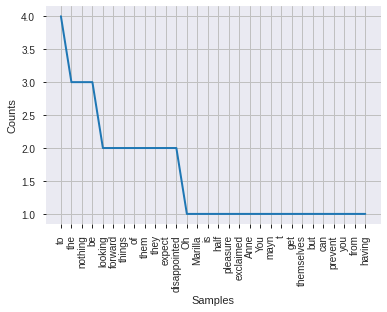

In [ ]:
# Frequency Distribution Plot
%matplotlib inline
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Word Embeddings 

Word embeddings are the dense representation of the words into vector forms. Sometimes, they are used to understand the hidden relationship between the words. 

For instance, if we subtract "*man-ness*" from "*king*" and add "*woman-ness*", then the resulting word would be "*queen*". This helps to capture the analogy - king is to queen as man is to woman. 

#### Bag-of-Words (BoW) and Bag-of-ngrams

BoW extracts words (or features) - unigrams - from the text to be used as input to machine learning models. It works on the intuition that two documents are similar if they consist of similar content. When the bigram or trigram (or ngram) features are extracted, then it is called ***bag-of-ngrams***.  

Different feature representations are: 


1.   One-hot encoding
2.   Word Count 
3.   Term Frequency 

Advantages: 
*   Simple and easy to understand and use

Disadvantages: 
*   Does not consider the order of the words in the text 
*   Vector size increases with increase in the number of words 
*   Results in sparse matrix, hence, needs large computational resources when the number of document increases




In [ ]:
#One-hot encoding 
import numpy as np
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from nltk.tokenize import word_tokenize

#Taken from A Tale of Two Cities 
data1 = "it was the best of times"
data2 = "it was the worst of times"
data3 = "it was the age of wisdom"
data4 = "it was the age of foolishness"

tokenized_word1=word_tokenize(data1)
print(tokenized_word1)
tokenized_word2=word_tokenize(data2)
print(tokenized_word2)

values1 = np.array(tokenized_word1)
values2 = np.array(tokenized_word2)

# integer encode
label_encoder = LabelEncoder()
integer_encoded1 = label_encoder.fit_transform(values1)
print(integer_encoded1)
integer_encoded2 = label_encoder.fit_transform(values2)
print(integer_encoded2)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded1 = integer_encoded1.reshape(len(integer_encoded1), 1)
onehot_encoded1 = onehot_encoder.fit_transform(integer_encoded1)
print(onehot_encoded1)

integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder.fit_transform(integer_encoded2)
print(onehot_encoded2)


['it', 'was', 'the', 'best', 'of', 'times']
['it', 'was', 'the', 'worst', 'of', 'times']
[1 5 3 0 2 4]
[0 4 2 5 1 3]
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [ ]:
#Count of number of times a word occurs in a document 
# ome words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.

from sklearn.feature_extraction.text import CountVectorizer

text = ["it was the best of times it was the worst of times"]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'it': 1, 'was': 5, 'the': 3, 'best': 0, 'of': 2, 'times': 4, 'worst': 6}
(1, 7)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 2 2 2 2 2 1]]


#### Term Frequency (TF)

TF refers how often a given word appears in a document. TF of a term t is calculated as:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document) 

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
# list of text documents
text = "it was the best of times it was the worst of times"
tokenized_text = word_tokenize(text)

from nltk import ngrams, FreqDist
counts  = FreqDist()
tokens = FreqDist()

for word in tokenized_text:
    counts['words'] += 1
    tokens[word] += 1

print(word, float(counts['words']) / float(len(tokens)))



times 1.7142857142857142


#### Term Frequency - Inverse Document Frequency (TF - IDF)

* TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.
* TF-IDF is commonly used for document search and information retrieval. 
* Tf-IDF is the product of TF and IDF 

IDF is calculated as: 

IDF(t) = log_e(Total number of documents / Number of documents with term *t* in it)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["it was the best of times", "it was the worst of times", "it was the age of wisdom", "it was the age of foolishness"]

# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'it': 3, 'was': 7, 'the': 5, 'best': 1, 'of': 4, 'times': 6, 'worst': 9, 'age': 0, 'wisdom': 8, 'foolishness': 2}
[1.51082562 1.91629073 1.91629073 1.         1.         1.
 1.51082562 1.         1.91629073 1.91629073]
(1, 10)
[[0.         0.60735961 0.         0.31694544 0.31694544 0.31694544
  0.4788493  0.31694544 0.         0.        ]]


#### **Pre-trained (Neural) Word Embeddings**

There are two (widely used) pre-trained word embeddings:

1.   Word2Vec
2.   GloVe: Global Vectors



##### **Word2Vec**

*   Developed by Google 
*   Trained on the Google News dataset (about 100 billion words)
*   Shallow network architecture: feed-forward neural network with just one hidden layer
*   Based on how the embeddings are learned, it is classified into two categories 
 
> 1.   Skip-gram model
> 2.   Continuous Bag of Words (CBoW)
 


1. *Skip-gram model*

>*  Learns the context word given the target word. 
>*   Consider a sliding window of fixed size. Move this along the sentence. Suppose the word in the middle is the target. The model tries to predict the probability of a word being the context word given the target word. 

>> "Wisdom comes to us when it can no longer do any good" -Gabriel Garcia Marquez 

>> 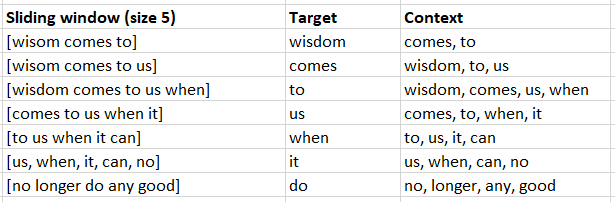

Each context-target pair is treated as a new observation in the data. For example, the target word “wisdom” in the above case produces four training samples: (“wisdom”, “comes”), (“wisdom”, “to”). 

2. *Continuous Bag of Words*

>*   Learns the target word given the context words.
>*   Kind of - inverse of skip-gram model 

>> 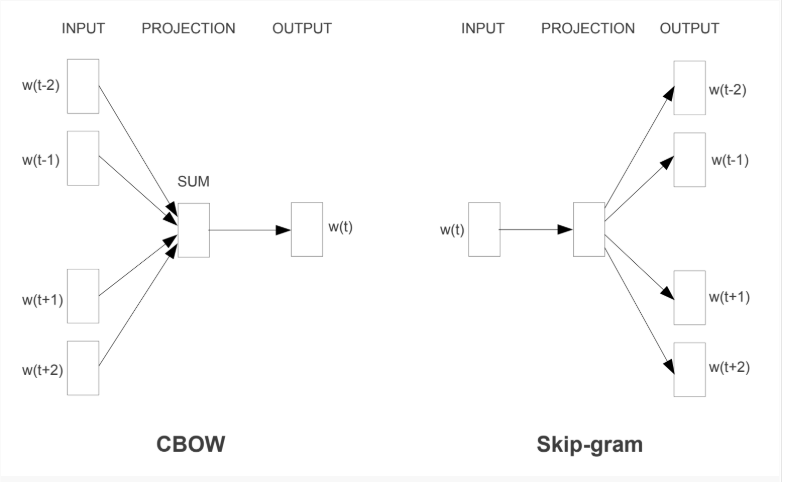



In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-1.4378970e-03  3.0764856e-03  2.9276148e-03 -4.9450533e-03
  2.0107781e-03 -1.8431809e-03  1.6418458e-03  4.6357125e-04
  2.2024242e-03  3.8661100e-03 -1.3890365e-04 -2.7158966e-03
 -2.7144917e-03 -3.0125929e-03 -2.6333255e-03  2.9547650e-03
  1.4944850e-03 -2.6413680e-03  4.5101326e-03  2.3136917e-03
 -1.5448665e-03 -4.4304423e-05 -8.4578397e-04 -2.8797542e-04
 -1.2231672e-03 -3.2684351e-03 -1.9580941e-03 -1.2245138e-04
  3.6070282e-03 -1.1419374e-03 -3.7864610e-03 -1.9217367e-04
 -8.8314514e-04  1.7192659e-03 -3.6826103e-03  1.5969935e-03
  6.8358891e-04 -2.2593713e-03  2.1194667e-03 -2.1907841e-03
 -9.4898965e-04  4.2870701e-03 -1.6634532e-03 -1.4693035e-03
  2.0512505e-03  2.0368437e-03 -3.0659125e-03  3.0382189e-03
 -2.9056268e-03  2.2495701e-03 -4.5528151e-03  3.5486750e-03
  2.2920961e-03  1.3236275e-03  2.7479937e-0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


##### **GloVe: Global Vectors**

*   Developed by researchers at Stanford
*   Intuition is to obtain the relationship between the words using Global statistics 
*   Uses the concept of co-occurence of words i.e., words that occur together in a sentence. 

Let us understand the concept by taking an example: Consider a collection of text (also known as corpus) - "I enjoy eating chocolates, I love chocolates and I love ice-creams"

We would obtain the following co-occurence matrix: 

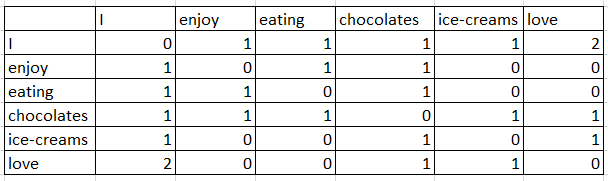

Intuition is the it is easier to capture the word meanings by using the ratios of co-occurence probabilities rather than the probabilites themselves. 

So, here, we want to obtain the relationship between two words: "enjoy" and "love". We determine the same by considering the third context word (i.e., chocolates in our example).

Calculating the probability of a pair of words: 

Pco (wk|wi) = C(wi,wk)|C(wi) 

wi = enjoy; wj = love; wk = chocolates

P(chocolates/enjoy) = C(chocolates, enjoy)|C(enjoy) = 1/1 = 1

P(chocolates/love) = C(chocolates, love)|C(love) = 1/2 = 0.5
 

The global vector relationship is 


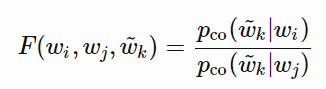

P(chocolate|enjoy) / P(chocolate|love) = 1/0.5 = 2

Since the ratio is greater than 1, the most related word to "enjoy" is "love" as compared to "chocolate". If the ratio is close to one, then both "love" and "chocolate" are equally related to "enjoy"








In [ ]:
#! pip install glove_python
import itertools
from gensim.models.word2vec import Text8Corpus
import glove
 
 
word_embedding = glove.Glove.load_stanford(glove_100k_50d_path)
word_embedding.word_vectors.shape

word_embedding.most_similar('king')

#Code to be updated

NameError: ignored

## **Classification of Real and Fake News**

To classify whether a news article is fake or real.
 
Data source: [Kaggle](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv)

In [ ]:
import warnings 
warnings.simplefilter("ignore")

import os 
from google.colab import files

import pandas as pd 
import numpy as np 

#nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk import word_tokenize
stop_words = set(stopwords.words('english'))

#Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

#Classifiers
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,  LinearSVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

#Performance metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_recall_fscore_support

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
uploaded = files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [ ]:
fake_data = pd.read_csv("Fake.csv")
real_data = pd.read_csv("True.csv")

In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#Print the number of missing values in both dataframes: real_data and fake_data
print("For fake_data")
print(fake_data.isnull().sum())

print("For real_data")
print(real_data.isnull().sum())

For fake_data
title      0
text       0
subject    0
date       0
dtype: int64
For real_data
title      0
text       0
subject    0
date       0
dtype: int64


In [ ]:
fake_data["label"] = 1
real_data["label"] = 0
print(fake_data.head())
print(real_data.head())

                                               title  ... label
0   Donald Trump Sends Out Embarrassing New Year’...  ...     1
1   Drunk Bragging Trump Staffer Started Russian ...  ...     1
2   Sheriff David Clarke Becomes An Internet Joke...  ...     1
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...     1
4   Pope Francis Just Called Out Donald Trump Dur...  ...     1

[5 rows x 5 columns]
                                               title  ... label
0  As U.S. budget fight looms, Republicans flip t...  ...     0
1  U.S. military to accept transgender recruits o...  ...     0
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...     0
3  FBI Russia probe helped by Australian diplomat...  ...     0
4  Trump wants Postal Service to charge 'much mor...  ...     0

[5 rows x 5 columns]


In [ ]:
#Combine the both fake_data and real_data; shuffle the data; and split them into training and test dataset

print("Dimension of Fake News:", fake_data.shape)
print("Dimension of Real News:", real_data.shape)
fake_real_data = pd.concat([fake_data,real_data])
print("Dimension of combined dataset:", fake_real_data.shape)
fake_real_data = fake_real_data.sample(frac=1).reset_index(drop=True)

Dimension of Fake News: (23481, 5)
Dimension of Real News: (21417, 5)
Dimension of combined dataset: (44898, 5)


In [ ]:
#Combining both healdlines and news content to form another column called "content"

fake_real_data["content"] = fake_real_data["title"] + fake_real_data["text"]
print(fake_real_data.columns)

Index(['title', 'text', 'subject', 'date', 'label', 'content'], dtype='object')


In [ ]:
#Splitting dataset into train and test dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    fake_real_data["content"], fake_real_data['label'], test_size=0.3, random_state=1)

print("Dimension of training data:", X_train.shape)
print("Dimension of test data:", X_test.shape)

Dimension of training data: (31428,)
Dimension of test data: (13470,)


### **Text Pre-processing**

### **Exploratory Analysis**


### **Word Embeddings** 

### **Classifiers**

### **Performance Evaluation**


## **Future Work**

I have used NLTK primarily for the analysis. The notebook will be continuously upated to give a comparison of preprocessing the text using NLTK and spaCy. Also, I intend to extend the notebook by implementing deep learning models for text classification. 

For information on other projects: [GitHub](https://github.com/dhanyajothimani) [Kaggle](https://www.kaggle.com/dhanyajothimani)


### **References** 

Concepts compiled from various sources including Python package documentation, Data camp, and StackOverflow.

Text for examples were taken from "Anne from Green Gables" and "A Tale of Two Cities".